In [4]:
# To render pictures and labels properly 
%matplotlib inline 

import numpy as np 
import matplotlib.pyplot as plt 

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [5]:
nb_classes = 10 # the number of total classes (categories) there are (0-9) 

# the data, shuffled and split between train and test sets 
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", Y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


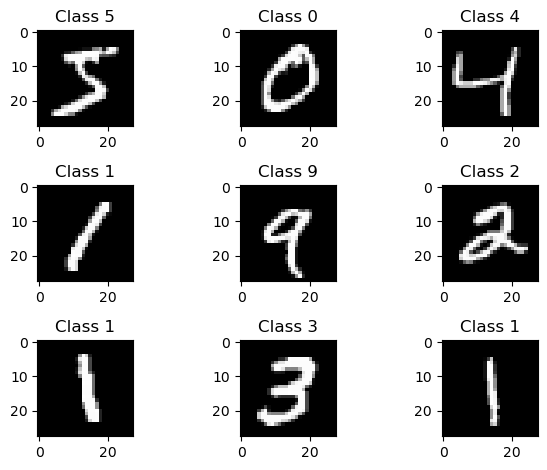

In [6]:
for i in range(9): 
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
    plt.title("Class {}".format(Y_train[i]))
plt.tight_layout()

In [7]:
print(X_train[0])
print("Shape: " + str(X_train[0].shape))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
# the numpy reshape function can be used to reshape an array, as long as the new and old shapes contain the same amount of elements
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

In [10]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [11]:
# Keras has a built-in one-hot-encoding function
Y_train = tf.keras.utils.to_categorical(Y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, nb_classes)

In [12]:
print(X_train[0])
print(Y_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [16]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(512, input_shape = (784,)), 
                              tf.keras.layers.Activation('relu'), 
                              tf.keras.layers.Dropout(0.2), 
                              tf.keras.layers.Dense(10), 
                              tf.keras.layers.Activation('softmax')
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.fit(X_train, Y_train, 
         batch_size = 128, epochs = 4, verbose = 1,
         validation_data = (X_test, Y_test))

Epoch 1/4
469/469 [==============================] - 1s 2ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0658 - val_accuracy: 0.9802
Epoch 2/4
469/469 [==============================] - 1s 2ms/step - loss: 0.0415 - accuracy: 0.9874 - val_loss: 0.0658 - val_accuracy: 0.9798
Epoch 3/4
469/469 [==============================] - 1s 2ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0621 - val_accuracy: 0.9808
Epoch 4/4
469/469 [==============================] - 1s 2ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0610 - val_accuracy: 0.9805


In [22]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print(score)
print('Test score:', score[0])
print('Test accuracy:', score[1])

[0.06098499149084091, 0.9804999828338623]
Test score: 0.06098499149084091
Test accuracy: 0.9804999828338623


In [23]:
predictions = model.predict(X_test)
print(predictions[0])

313/313 [==============================] - 0s 402us/step
[1.1230092e-08 5.7347092e-09 8.1681350e-07 3.0770516e-05 7.7608447e-11
 3.7318763e-08 1.2786898e-11 9.9996340e-01 2.3974113e-07 4.7526073e-06]


In [24]:
predicted_classes = np.argmax(predictions, axis = -1)
print(predicted_classes)

[7 2 1 ... 4 5 6]


In [25]:
# Check which items we got right and wrong 
Y_test = np.argmax(Y_test, axis = -1)
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

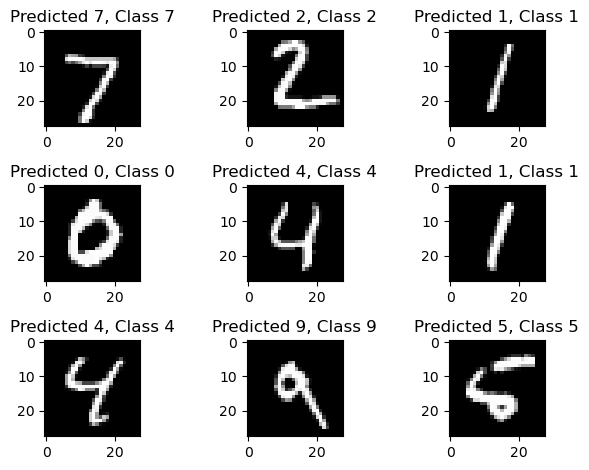

In [26]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
plt.tight_layout()

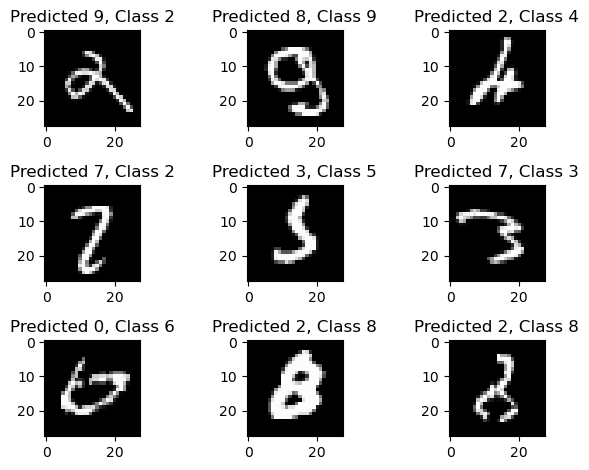

In [27]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))

plt.tight_layout()

In [28]:
# Import the IPython module to access its functions
from IPython.display import display, Javascript

# Use JavaScript to get the current notebook's file path
display(Javascript('IPython.notebook.notebook_path'))

<IPython.core.display.Javascript object>